# Housing and stock market data exploration and cleanup

In [2]:
# Import Dependencies
import quandl
import pandas as pd
import csv
import scipy.stats as stats
import matplotlib.pyplot as mpl
import matplotlib.font_manager as fm
import datetime as datetime
import numpy as np
from scipy import stats

## Obtaining City Area Codes to query with Quandl library

In [3]:
#open and read areas_city which contains area codes to run queries with Quandl
city_file = open("Resources/areas_city.txt", 'r', newline = None)
city_list = city_file.readlines()


#remove header
city_list.pop(0)

# Make a list of cities contatining city, state, and area code
cities = []
for each in range(len(city_list)):
    # Split each line in text file into a list while removing \n 
    cities.append(city_list[each].strip("\n"))

cities = [item.replace("|", ",") for item in cities]


# # split the cities list into City, State, Area Code format
cities = [each.split(",") for each in cities]

for each in cities:
    each[1] = each[1].lstrip()

cities


[['Aaronsburg', 'PA', '22759'],
 ['Abbeville', 'AL', '4309'],
 ['Abbeville', 'GA', '17572'],
 ['Abbeville', 'LA', '14615'],
 ['Abbeville', 'MS', '16597'],
 ['Abbeville', 'SC', '24719'],
 ['Abbot', 'ME', '19942'],
 ['Abbotsford', 'WI', '6609'],
 ['Abbott', 'PA', '20990'],
 ['Abbottstown', 'PA', '21077'],
 ['Abell', 'MD', '10858'],
 ['Aberdeen', 'ID', '23966'],
 ['Aberdeen', 'MD', '1554'],
 ['Aberdeen', 'MS', '15895'],
 ['Aberdeen', 'NC', '2337'],
 ['Aberdeen', 'NJ', '19818'],
 ['Aberdeen', 'OH', '6584'],
 ['Aberdeen', 'SD', '12280'],
 ['Aberdeen', 'WA', '1546'],
 ['Abernathy', 'TX', '16107'],
 ['Abie', 'NE', '23123'],
 ['Abilene', 'KS', '13529'],
 ['Abilene', 'TX', '11806'],
 ['Abingdon', 'IL', '17636'],
 ['Abingdon', 'MD', '1093'],
 ['Abingdon', 'VA', '1375'],
 ['Abington Township', 'PA', '6796'],
 ['Abington', 'MA', '1971'],
 ['Abington', 'PA', '2074'],
 ['Abita Springs', 'LA', '14708'],
 ['Abram-Perezville', 'TX', '24552'],
 ['Abrams', 'WI', '18019'],
 ['Absecon', 'NJ', '3266'],
 ['A

In [4]:
# Read ticker_list of companies that are of interest
ticker_file = "Resources/ticker_list.csv"

tickers_df = pd.read_csv(ticker_file)
tickers_df.head()

,name,city,state,ticker,quandl_code,industry_type
0,Cardinal Health Inc.,Dublin,OH,CAH,CAH,Other
1,FedEx Corporation,Memphis,TN,FDX,FDX,Other
2,Hawaiian Holdings Inc.,Honolulu,HI,HA,HA,Other
3,Las Vegas Sands Corp.,Las Vegas,NV,LVS,LVS,Other
4,Sanderson Farms Inc.,Laurel,MS,SAFM,SAFM,Other


In [5]:
# Search through dataframe contatining companies 
# in order to obtain area codes
# Store data into city_area_code list
city_area_code = []
for each in range(len(tickers_df)):
    current_city = tickers_df.city[each]
#     print(f'Current City: {current_city}')
    current_state = tickers_df.state[each]
#     print(f'Current State: {current_state}')
    
    for each in cities:
        if current_city == each[0] and current_state == each[1]:
            city_area_code.append(each[2])
city_area_code

['948',
 '12',
 '34',
 '5',
 '12171',
 '4722',
 '11733',
 '13',
 '55',
 '85',
 '537',
 '15',
 '428',
 '1',
 '75',
 '740',
 '11739',
 '214',
 '12621',
 '1589']

In [6]:
# Add a new column containing city area codes to tickers dataframe
tickers_df["area_code"] = city_area_code
tickers_df.head()

,name,city,state,ticker,quandl_code,industry_type,area_code
0,Cardinal Health Inc.,Dublin,OH,CAH,CAH,Other,948
1,FedEx Corporation,Memphis,TN,FDX,FDX,Other,12
2,Hawaiian Holdings Inc.,Honolulu,HI,HA,HA,Other,34
3,Las Vegas Sands Corp.,Las Vegas,NV,LVS,LVS,Other,5
4,Sanderson Farms Inc.,Laurel,MS,SAFM,SAFM,Other,12171


In [7]:
# export file with new area code column to csv
tickers_df.to_csv("ticker_list_areacode.csv", index=False, header=True)

# Running Loops for Stock, Housing Data / Visualization

In [9]:
quandl.ApiConfig.api_key = "Me2EN7fRUzDgxznxtEk_"

In [10]:
# Pulling data from API for stock data
# Skipping all data points that contain a split in the stock values and storing that information
# for later use in code (we do not use, but may be useful in iterations that include refinement of code)
stock_skip = []
qndl_code = tickers_df['quandl_code']
for x in qndl_code:
    if x in ['ABC', 'AAPL', 'CVS', 'NKE']:
        stock_skip.append(x)
        pass
    else:
        data_pull = quandl.get(f"EOD/{x}", start_date="2005-01-01", end_date='2015-12-31', collapse="monthly")
        data_pull.to_csv(f"API_data/{x}_FullData.csv")
        clean_df = pd.DataFrame(data_pull['Close'])
        clean_df.to_csv(f"stock_data/{x}_stock.csv")
        print(f"{x} stock data saved")
print('Data Finished')

CAH stock data saved
FDX stock data saved
HA stock data saved
LVS stock data saved
SAFM stock data saved
ANTM stock data saved
BAC stock data saved
HUM stock data saved
PFG stock data saved
AMZN stock data saved
LMT stock data saved
VZ stock data saved
XOM stock data saved
HD stock data saved
WBA stock data saved
WMT stock data saved
Data Finished


In [11]:
# Pulling API data for our housing information. This is automatically pulled by month
# so we do not need to add a 'collapse' parameter to the API pull

house_code = tickers_df['area_code']
# remove leading zeroes for each area code number
house_code = [each.lstrip("0") for each in house_code]
stock_name = tickers_df['ticker']
# Using a y value to cycle through the actual stock names since we are using
# our X value as the city code. If we use X we will save and print the city code rather than the 
# stock name that allows us to keep our data consistent for later purposing
y=0
for x in house_code:
    # Skipping housing data for ABC, CVS, and NKE
    if x in ['4722', '740', '214']:
        pass
    else:
        try:
            data_pull = quandl.get(f'ZILLOW/C{x}_MSPAH', start_date="2005-01-01", end_date="2015-12-31")
            data_pull.to_csv(f'house_data/{stock_name[y]}_housing.csv')
            print(f'{stock_name[y]} housing data pulled')
    
        except:
            print(f'{x} not found, skipping')
            pass
    y = y + 1
print('Data Finished')

CAH housing data pulled
FDX housing data pulled
HA housing data pulled
LVS housing data pulled
12171 not found, skipping
11733 not found, skipping
BAC housing data pulled
HUM housing data pulled
PFG housing data pulled
AAPL housing data pulled
AMZN housing data pulled
LMT housing data pulled
VZ housing data pulled
XOM housing data pulled
HD housing data pulled
WBA housing data pulled
WMT housing data pulled
Data Finished


In [12]:
#looping our Stock graphs
stock_fullname = tickers_df['name']
city_name = tickers_df['city']

y=0
for x in stock_name:
    try:
        stock_csv = pd.read_csv(f'stock_data/{x}_stock.csv')
        housing_csv = pd.read_csv(f'house_data/{x}_housing.csv')
        #shortening our X axis to keep the data visually clean
        housing_price1000 = [(each/1000) for each in housing_csv['Value']]
        
    # Add housing plot
        mpl.subplot(2, 1, 1)
        mpl.plot(housing_csv['Date'], housing_price1000, color='orange')
        
        # Label graph title and y label
        mpl.title(f'{stock_fullname[y]} ({x}) stock and\n{city_name[y]} housing market (2005 to 2015)', fontsize=28)
        mpl.ylabel("Median Housing Prices\nin Dollars (x1000)", labelpad=12, fontsize=20)
        
        # Set tick numbers
        mpl.xticks([]) #Remove xlabels for upper graphs
        if max(housing_price1000) > 1000:
            mpl.yticks(np.arange(0, max(housing_price1000)+50, step=200), fontsize=20)
        else:
            mpl.yticks(np.arange(0, max(housing_price1000)+50, step=50), fontsize=20)
        
        #Set axes limits
        mpl.xlim(-1, len(stock_csv['Date']))
        mpl.ylim(min(housing_price1000)-50, max(housing_price1000) + 50)

    # Add Stock plot
        mpl.subplot(2, 1, 2)
        mpl.plot(stock_csv['Date'], stock_csv['Close'])

        # Label axes
        mpl.xlabel("Dates", fontsize=20)
        mpl.ylabel("Stock Close\nPrice($)", labelpad=12, fontsize=20)

        # Set axes limits
        mpl.xlim(-1, len(stock_csv['Date'])+3)
        mpl.ylim(0, max(stock_csv['Close'])+30)
        
        # Set tick numbers
        mpl.xticks(np.arange(0, len(stock_csv['Date'])+3, step=6), rotation=45, fontsize=15)
        if max(stock_csv['Close']) > 500:
            mpl.yticks(np.arange(0, max(stock_csv['Close'])+30, step=200), fontsize=20)
        else:
            mpl.yticks(np.arange(0, max(stock_csv['Close'])+30, step=30), fontsize=20)

        # set spacing between two blots
        mpl.subplots_adjust(hspace=0.1)

        # Enlarge figure size
        fig=mpl.gcf()
        fig.set_size_inches(14, 12)
        
        mpl.savefig(f'stock_graph/{x}_stock_line.png')
        mpl.clf()
    except:
        pass
                   
    y+=1

<Figure size 1008x864 with 0 Axes>

In [13]:
# Combine all stock and housing lists into one dataframe

combined_stock_housing_df = pd.DataFrame({
    'date': stock_csv['Date']
})
stock_tickers = tickers_df['ticker']

for each in stock_tickers:
    # Excluding data from ABC, NKE, CVS, SAFM, ANTM
    if each in ['ABC', 'NKE', 'CVS', 'SAFM', 'ANTM', 'CAH']:
        pass       
    else:
        current_stock = pd.read_csv(f'stock_data/{each}_stock.csv')
        current_house = pd.read_csv(f'house_data/{each}_housing.csv')
        combined_stock_housing_df[f'{each}_stock']=current_stock['Close']
        combined_stock_housing_df[f'{each}_housing']=current_house['Value']
        
combined_stock_housing_df.head()        

,date,FDX_stock,FDX_housing,HA_stock,HA_housing,LVS_stock,LVS_housing,BAC_stock,BAC_housing,HUM_stock,...,VZ_stock,VZ_housing,XOM_stock,XOM_housing,HD_stock,HD_housing,WBA_stock,WBA_housing,WMT_stock,WMT_housing
0,2005-01-31,95.65,103735.0,6.64,346000.0,43.40,241690.0,46.37,151250.0,34.27,...,35.59,381625.00,51.60,139702.60,41.26,183200.0,42.61,480625.0,52.40,205450.0
1,2005-02-28,97.78,102265.0,6.51,348750.0,47.90,247183.0,46.65,154850.0,33.27,...,35.97,387187.50,63.31,135448.95,40.02,183050.0,42.83,467800.0,51.61,180450.0
2,2005-03-31,93.95,101015.0,6.54,344250.0,45.00,252257.0,44.10,156300.0,31.94,...,35.50,404792.00,59.60,141658.15,38.24,186450.0,44.42,412300.0,50.11,152750.0
3,2005-04-30,84.95,102760.0,5.92,339900.0,37.45,253250.0,45.04,154950.0,34.65,...,35.80,405748.15,57.03,142454.90,35.37,190300.0,43.06,435650.0,47.14,155500.0
4,2005-05-31,89.42,108790.0,5.34,325500.0,36.26,256617.5,46.32,156450.0,36.36,...,35.38,410469.35,56.20,141596.25,39.35,189683.5,45.34,484250.0,47.23,163300.0


In [14]:
# Export combined stock and housing data as CSV
combined_stock_housing_df.to_csv("stats_data_graphs/combined_stock_housing.csv", index=False, header=True)

In [70]:
# Create a list to store output of pearson r calculation
stock_house_pearsonr = []

# Use Pearson r correlation calculation for each stock-housing pair
for each in stock_tickers:
    # Excluding data from ABC, NKE, CVS, SAFM, ANTM
    if each in ['ABC', 'NKE', 'CVS', 'SAFM', 'ANTM', 'CAH']:
        pass
    elif each in ['HA', 'AAPL', 'LMT', 'WBA', 'WMT']:
        stock = combined_stock_housing_df[f'{each}_stock']
        house = combined_stock_housing_df[f'{each}_housing']
        stock_house_df = pd.DataFrame({
            "stock": stock,
            "house": house
        })
        # remove NaN
        stock_house_df = stock_house_df.dropna(0)
        stock_house_pearsonr.append(stats.pearsonr(stock_house_df["stock"], stock_house_df["house"]))
    else:
        stock_house_pearsonr.append(stats.pearsonr(combined_stock_housing_df[f'{each}_stock'], combined_stock_housing_df[f'{each}_housing']))

In [71]:
stock_house_pearsonr

[(0.3035706492566898, 0.0004024524933259424),
 (0.5577722735016317, 4.497376542657269e-12),
 (0.4775517003366646, 7.041971077772056e-09),
 (-0.46554610829461296, 1.858332119796978e-08),
 (0.7898524399294681, 2.1969900965706605e-29),
 (0.5873247736290396, 1.3397891325895114e-13),
 (0.8661467003539793, 2.2572579805614454e-40),
 (0.6405463909414104, 1.330493935711843e-16),
 (0.5770736024572899, 5.416213914223047e-13),
 (0.1875719410548092, 0.031264152880765755),
 (0.7231218456830025, 1.233881285475628e-22),
 (0.7251010093735154, 8.317909813437294e-23),
 (0.35018636229979033, 0.0002029987739405773),
 (0.3240608461475547, 0.00017937777093442823)]

In [72]:
# Convert Tuple to list
stock_house_pearsonr_list=[]
for each in stock_house_pearsonr:
    stock_house_pearsonr_list.append(list(each))

stock_house_pearsonr_list

[[0.3035706492566898, 0.0004024524933259424],
 [0.5577722735016317, 4.497376542657269e-12],
 [0.4775517003366646, 7.041971077772056e-09],
 [-0.46554610829461296, 1.858332119796978e-08],
 [0.7898524399294681, 2.1969900965706605e-29],
 [0.5873247736290396, 1.3397891325895114e-13],
 [0.8661467003539793, 2.2572579805614454e-40],
 [0.6405463909414104, 1.330493935711843e-16],
 [0.5770736024572899, 5.416213914223047e-13],
 [0.1875719410548092, 0.031264152880765755],
 [0.7231218456830025, 1.233881285475628e-22],
 [0.7251010093735154, 8.317909813437294e-23],
 [0.35018636229979033, 0.0002029987739405773],
 [0.3240608461475547, 0.00017937777093442823]]

In [74]:
# Create list of only analyzed companies - removing companies
# we decide are unnecessary or outside of scope
cleaned_tickers = []
for each in stock_tickers:
    if each in ['ABC', 'NKE', 'CVS', 'SAFM', 'ANTM', 'CAH']:
        pass
    else:
        cleaned_tickers.append(each)

# Create csv containing all correlation values for plotting
correlation_vals = []
p_vals = []
for each in stock_house_pearsonr_list:
    correlation_vals.append(each[0])
    p_vals.append(each[1])
    
statistical_analysis= pd.DataFrame({
    "stock_ticker": cleaned_tickers,
    "pearson_r_correlation": correlation_vals,
    "p_values": p_vals
})

statistical_analysis.to_csv("stats_data_graphs/statistical_analysis.csv")

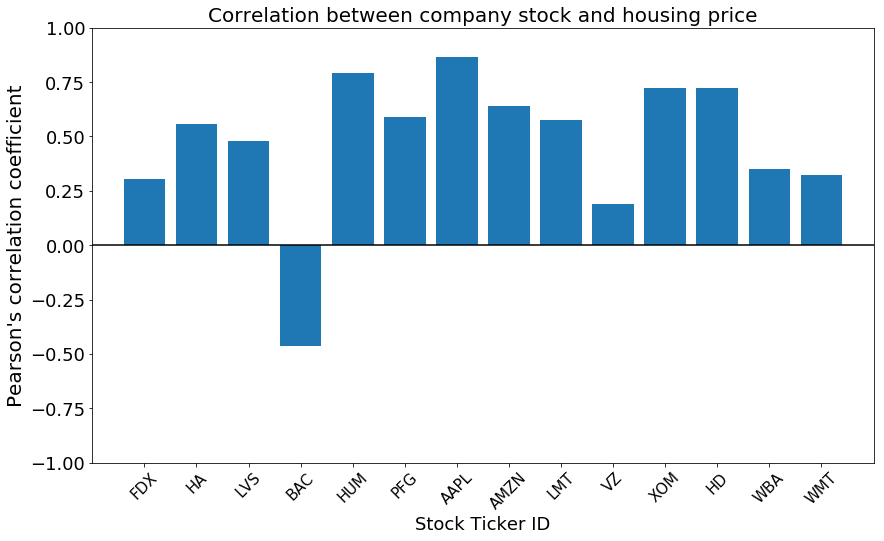

In [75]:
# Plot correlation values against each stock ticker
mpl.bar(cleaned_tickers, correlation_vals)
mpl.hlines(0,-1,14)
mpl.title("Correlation between company stock and housing price", fontsize=20)
mpl.ylabel("Pearson's correlation coefficient", fontsize=20)
mpl.xlabel("Stock Ticker ID", fontsize=18)
mpl.yticks(fontsize=18)
mpl.xticks(fontsize=15, rotation=45)
mpl.ylim(-1,1)
mpl.xlim(-1, 14)



# Enlarge figure size
fig=mpl.gcf()
fig.set_size_inches(14, 8)

mpl.savefig("stats_data_graphs/stock_housing_correlation.png")


In [76]:
# Averaging data for companies across each industry type
# for graphing based on industry type
# variables for each industry are the same since we reset the variables,
# and to efficiently code the information

ind_type = tickers_df['industry_type']
ind_tick = tickers_df['ticker']

# Creating Retail Average
tech_df = pd.DataFrame({'Date':[]})
tech_house = pd.DataFrame({'Date':[]})
for x in ['HD', 'LVS']:
    #Stock Data Averaging
    stock_csv = pd.read_csv(f'stock_data/{x}_stock.csv')
    value_stock = stock_csv['Close']
    date_stock = stock_csv['Date']
    tech_df[f'Value{x}'] = value_stock
    # Housing Data Averaging
    house_csv = pd.read_csv(f'house_data/{x}_housing.csv')
    value_house = house_csv['Value']
    date_house = house_csv['Date']
    tech_house[f'Value{x}'] = value_house
tech_df['Date'] = date_stock
tech_house['Date'] = date_house

tech_df.set_index('Date')
tech_df['AVG'] = tech_df.mean(axis=1)
tech_df.to_csv('industry_data/Retail_stock.csv')

tech_house.set_index('Date')
tech_house['houseAVG'] = tech_house.mean(axis=1)
tech_house.to_csv('industry_data/Retail_house.csv')


In [77]:
# Financial Average
tech_df = pd.DataFrame({'Date':[]})
tech_house = pd.DataFrame({'Date':[]})
for x in ['BAC', 'HUM', 'PFG']:
    #Stock Data Averaging
    stock_csv = pd.read_csv(f'stock_data/{x}_stock.csv')
    value_stock = stock_csv['Close']
    date_stock = stock_csv['Date']
    tech_df[f'Value{x}'] = value_stock
    # Housing Data Averaging
    house_csv = pd.read_csv(f'house_data/{x}_housing.csv')
    value_house = house_csv['Value']
    date_house = house_csv['Date']
    tech_house[f'Value{x}'] = value_house
tech_df['Date'] = date_stock
tech_house['Date'] = date_house

tech_df.set_index('Date')
tech_df['AVG'] = tech_df.mean(axis=1)
tech_df.to_csv('industry_data/Financial_stock.csv')

tech_house.set_index('Date')
tech_house['houseAVG'] = tech_house.mean(axis=1)
tech_house.to_csv('industry_data/Financial_house.csv')
# Add housing plot

In [78]:
# 'Other' Average
tech_df = pd.DataFrame({'Date':[]})
tech_house = pd.DataFrame({'Date':[]})
for x in ['FDX', 'HA', 'LVS']:
    #Stock Data Averaging
    stock_csv = pd.read_csv(f'stock_data/{x}_stock.csv')
    value_stock = stock_csv['Close']
    date_stock = stock_csv['Date']
    tech_df[f'Value{x}'] = value_stock
    # Housing Data Averaging
    house_csv = pd.read_csv(f'house_data/{x}_housing.csv')
    value_house = house_csv['Value']
    date_house = house_csv['Date']
    tech_house[f'Value{x}'] = value_house
tech_df['Date'] = date_stock
tech_house['Date'] = date_house

tech_df.set_index('Date')
tech_df['AVG'] = tech_df.mean(axis=1)
tech_df.to_csv('industry_data/Other_stock.csv')

tech_house.set_index('Date')
tech_house['houseAVG'] = tech_house.mean(axis=1)
tech_house.to_csv('industry_data/Other_house.csv')
  




In [79]:
# Tech Average
tech_df = pd.DataFrame({'Date':[]})
tech_house = pd.DataFrame({'Date':[]})
for x in ['AAPL', 'AMZN', 'LMT', 'VZ']:
    #Stock Data Averaging
    stock_csv = pd.read_csv(f'stock_data/{x}_stock.csv')
    value_stock = stock_csv['Close']
    date_stock = stock_csv['Date']
    tech_df[f'Value{x}'] = value_stock
    # Housing Data Averaging
    house_csv = pd.read_csv(f'house_data/{x}_housing.csv')
    value_house = house_csv['Value']
    date_house = house_csv['Date']
    tech_house[f'Value{x}'] = value_house
tech_df['Date'] = date_stock
tech_house['Date'] = date_house

tech_df.set_index('Date')
tech_df['AVG'] = tech_df.mean(axis=1)
tech_df.to_csv('industry_data/Tech_stock.csv')

tech_house.set_index('Date')
tech_house['houseAVG'] = tech_house.mean(axis=1)
tech_house.to_csv('industry_data/Tech_house.csv')



In [80]:
# Graphing industry Averages on loop
for x in ['Tech', 'Financial', 'Other', 'Retail']:
    stock_csv = pd.read_csv(f'industry_data/{x}_stock.csv')
    housing_csv = pd.read_csv(f'industry_data/{x}_house.csv')
    housing_price1000 = [(each/1000) for each in housing_csv['houseAVG']]

# Add housing plot
    mpl.subplot(2, 1, 1)
    mpl.plot(housing_csv['Date'], housing_price1000, color='orange')

    # Label graph title and y label
    mpl.title(f'{x} Industry stock and\n housing market (2005 to 2015)', fontsize=28)
    mpl.ylabel("Median Housing Prices\nin Dollars (x1000)", labelpad=12, fontsize=20)

    # Set tick numbers
    mpl.xticks([]) #Remove xlabels for upper graphs
    mpl.yticks(np.arange(0, max(housing_price1000)+50, step=50), fontsize=20)

    #Set axes limits
    mpl.xlim(-1, len(stock_csv['Date']))
    mpl.ylim(min(housing_price1000)-50, max(housing_price1000) + 50)

# Add Stock plot
    mpl.subplot(2, 1, 2)
    mpl.plot(stock_csv['Date'], stock_csv['AVG'])

    # Label axes
    mpl.xlabel("Dates", fontsize=20)
    mpl.ylabel("Stock Close\nPrice($)", labelpad=12, fontsize=20)

    # Set axes limits
    mpl.xlim(-1, len(stock_csv['Date'])+3)
    mpl.ylim(0, max(stock_csv['AVG'])+30)

    # Set tick numbers
    mpl.xticks(np.arange(0, len(stock_csv['Date'])+3, step=6), rotation=45, fontsize=15)
    if max(stock_csv['AVG']) > 300:
        mpl.yticks(np.arange(0, max(stock_csv['AVG'])+30, step=100), fontsize=20)
    else:
        mpl.yticks(np.arange(0, max(stock_csv['AVG'])+30, step=30), fontsize=20)

    # set spacing between two blots
    mpl.subplots_adjust(hspace=0.1)

    # Enlarge figure size
    fig=mpl.gcf()
    fig.set_size_inches(14, 12)

    mpl.savefig(f'stock_graph/{x}_line.png')
    mpl.clf()
    print(f'{x} Graph Created')


Tech Graph Created
Financial Graph Created
Other Graph Created
Retail Graph Created


<Figure size 1008x864 with 0 Axes>

In [81]:
# Adding all averages to DataFrame for evaluation and correlation graph
retail_house = pd.read_csv("industry_data/Retail_house.csv")
retail_stock = pd.read_csv("industry_data/Retail_stock.csv")
financial_house = pd.read_csv("industry_data/Financial_house.csv")
financial_stock = pd.read_csv("industry_data/Financial_stock.csv")
other_house = pd.read_csv("industry_data/Other_house.csv")
other_stock = pd.read_csv("industry_data/Other_stock.csv")
tech_house = pd.read_csv("industry_data/Tech_house.csv")
tech_stock = pd.read_csv("industry_data/Tech_stock.csv")

In [82]:
combined_industry_averages = pd.DataFrame({
    "retail_house": retail_house["houseAVG"],
    "retail_stock": retail_stock["AVG"],
    "financial_house": financial_house["houseAVG"],
    "financial_stock": financial_stock["AVG"],
    "other_house": other_house["houseAVG"],
    "other_stock": other_stock["AVG"],
    "tech_house": tech_house["houseAVG"],
    "tech_stock": tech_stock["AVG"]
})
combined_industry_averages.head()

,retail_house,retail_stock,financial_house,financial_stock,other_house,other_stock,tech_house,tech_stock
0,212445.0,42.330,111571.666667,40.406667,230475.000000,48.563333,523795.6250,53.38000
1,215116.5,43.960,112853.333333,39.646667,232732.666667,50.730000,504565.0000,55.02250
2,219353.5,41.620,116375.000000,38.176667,232507.333333,48.496667,549056.7500,53.54250
3,221775.0,36.410,118303.333333,39.590000,231970.000000,42.773333,578033.2875,50.30750
4,223150.5,37.805,120830.000000,40.856667,230302.500000,43.673333,598754.8375,53.82465


In [83]:
# Export combined industry averages as csv
combined_industry_averages.to_csv("stats_data_graphs/combined_industry_averages.csv")

# Upon closer view of combined_industry_averages file, tech_house stock is not the same length as tech_stock column
# need to remove unpaired values in order to run pearson r calculation.
# Manual removal of the last 2 data points in tech_stock column was performed

In [84]:
# Create a list to store output of pearson r calculation
industry_type_pearsonr= []
industry=["retail", "financial", "other", "tech"]

combined_industry_file = pd.read_csv("stats_data_graphs/combined_industry_averages.csv")

# Separated tech industry from rest of industries due to shortened data set
tech_stock = combined_industry_file["tech_stock"]
tech_house = combined_industry_file["tech_house"]
tech_df = pd.DataFrame({
    "tech_stock": tech_stock,
    "tech_house": tech_house
})

# drop NAN values from last 2 rows
tech_df = tech_df.dropna(0)

# Use Pearson r correlation calculation for each stock-housing pair
for each in industry:
    if each == "tech":
        industry_type_pearsonr.append(stats.pearsonr(tech_df['tech_stock'], tech_df['tech_house']))
    else:
        industry_type_pearsonr.append(stats.pearsonr(combined_industry_file[f'{each}_stock'], combined_industry_file[f'{each}_house']))

industry_type_pearsonr       

[(0.4754005876090374, 8.40236647197887e-09),
 (0.608240231938284, 1.0320993692959025e-14),
 (0.5460069293215398, 1.2777485835532588e-11),
 (0.8214770577457223, 5.091332628357323e-33)]

In [85]:
# Convert Tuple to list
industry_type_pearsonr_list=[]
for each in industry_type_pearsonr:
    industry_type_pearsonr_list.append(list(each))
    print(each)
industry_type_pearsonr_list

(0.4754005876090374, 8.40236647197887e-09)
(0.608240231938284, 1.0320993692959025e-14)
(0.5460069293215398, 1.2777485835532588e-11)
(0.8214770577457223, 5.091332628357323e-33)


[[0.4754005876090374, 8.40236647197887e-09],
 [0.608240231938284, 1.0320993692959025e-14],
 [0.5460069293215398, 1.2777485835532588e-11],
 [0.8214770577457223, 5.091332628357323e-33]]

In [86]:
correlation_vals = []
p_vals = []
for each in industry_type_pearsonr_list:
    correlation_vals.append(each[0])
    p_vals.append(each[1])
    
statistical_analysis= pd.DataFrame({
    "industry": industry,
    "pearson_r_correlation": correlation_vals,
    "p_values": p_vals
})

statistical_analysis.to_csv("stats_data_graphs/industry_analysis.csv")

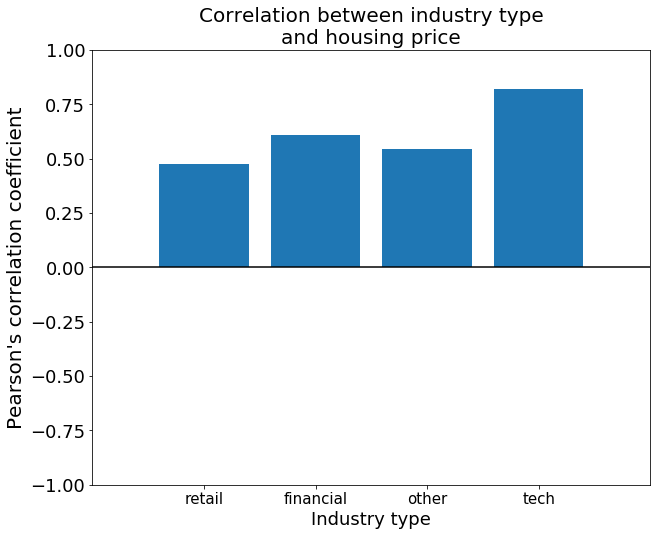

In [87]:
# Plot correlation values against each stock ticker
mpl.bar(industry, correlation_vals)
mpl.hlines(0,-1,4)
mpl.title("Correlation between industry type\nand housing price", fontsize=20)
mpl.ylabel("Pearson's correlation coefficient", fontsize=20)
mpl.xlabel("Industry type", fontsize=18)
mpl.yticks(fontsize=18)
mpl.xticks(fontsize=15)
mpl.ylim(-1,1)
mpl.xlim(-1, 4)



# Enlarge figure size
fig=mpl.gcf()
fig.set_size_inches(10, 8)

mpl.savefig("stats_data_graphs/industry_correlation.png")


In [88]:
# End of code